# FIT 1043 Introduction to Data Science

## Assignment 2

### Harvey Koay Wern Shern

### 34046917



The main objective of this Assignment is to conduct predictive analytics by building predictive models on a dataset using Python in Jupyter Notebook. Thus, we will explore the following Data sets:

1. FIT1043-Essay-Features.csv
2. FIT1043-Essay-Features-Submission.csv

# Part A: Classification

# A1. Supervised learning

### Question 1

Supervised machine learning is where the algorithms learn to predict the output from the input data and all data is labelled where the goal is to estimate the mapping function to a point where you can predict the output variable when new input data is given for that data.

The notion of labelled data are data tagged by one or more categories to train and test models which are vital for supervised learning, and aiding in quality model training

Training Set: In data science, the training set is the chunk of data specifically reserved for teaching a machine learning model how to recognize patterns, relationships, or trends in the data. It is like a driving instructor teaching a new student how to drive.

Testing Set: The testing set, on the other hand, is another portion of data used to evaluate the model's performance. It's like testing the skills of a student after he learn to drive. 

### Question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('FIT1043-Essay-Features.csv')
dataset

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3


From this dataset i chose words, sentences, question, POS/total_words, and prompt_words/total_words as information that may affect may classification and model

In [2]:
x = dataset.iloc[:, [2, 7, 8, 11, 13]].values
y = dataset.iloc[:, -1].values
x

array([[4.26000000e+02, 1.60000000e+01, 0.00000000e+00, 9.95294065e-01,
        4.85915493e-01],
       [2.92000000e+02, 1.10000000e+01, 0.00000000e+00, 9.96551724e-01,
        5.06849315e-01],
       [8.49000000e+02, 4.90000000e+01, 2.00000000e+00, 9.94099580e-01,
        3.35689046e-01],
       ...,
       [3.63000000e+02, 1.30000000e+01, 3.00000000e+00, 9.98153278e-01,
        4.68319559e-01],
       [2.87000000e+02, 1.30000000e+01, 1.00000000e+00, 9.91837202e-01,
        5.01742160e-01],
       [5.42000000e+02, 2.20000000e+01, 3.00000000e+00, 9.94444444e-01,
        5.23985240e-01]])

In [3]:
y

array([4, 4, 4, ..., 3, 3, 4])

### Question 3

In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# A2. Classification(training)

### Question 1

Binary classification is a type of supervised machine learning task where the objective is to sort data into two distinct and exclusive categories. These categories can be denoted as 0 and 1, positive and negative, or true and false. In binary classification, models are trained using a labeled dataset, which means the data is already categorized into the desired outcomes.

Multiclass classification is also a type of supervised machine learning and involves categorizing data into three or more distinct groups or categories. Unlike binary classification, where the model makes a choice between just two classes for each data point, a multiclass classifier is trained to make predictions among three or more classes for each data point.



### Question 2a

Objective functions may not work properly in some machine learning algorithms without feature scaling as the range of values of raw data varies widely. The range of all the features should be normalised or scaled in order for each of them to contribute to the final distance uniformly.

### Question 2b

We fit_transform the training set but not the test set to scale to have a mean of 0 and a certain standard deviation which will be stored in the StandardScaler() and applied to the testing dataset using transform() function

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Question 3a

Support Vector Machines (SVMs) represent a versatile set of supervised learning techniques. They find applications in tasks like classification, regression, and identifying outliers. SVMs excel at drawing decision boundaries in data, making them valuable in various data analysis scenarios.

### Question 3b

In SVMs, kernels are mathematical tools that transform data into a higher-dimensional space to find more complex decision boundaries, making it useful for nonlinear classification problems. Common kernels include linear, polynomial, Gaussian (RBF), and sigmoid. The choice of kernel depends on the data and problem.

### Question 3c

#### Support Vector Machine algorithm

In [6]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

### Question 4

#### Decision Tree Classification 

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# A3. Classification (prediction)

### Question 1

#### Support Vector Machine algorithm

In [8]:
y_pred1 = clf.predict(X_test)
y_pred1

array([4, 3, 3, 2, 3, 4, 4, 4, 2, 4, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 2, 4,
       3, 3, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 2, 4, 3,
       3, 3, 4, 3, 2, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4,
       4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3,
       4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 2, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4,
       3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 4, 4,
       4, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 2, 4, 3,
       3, 4, 4, 2, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4,
       3, 4, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3,
       4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4,
       3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 2, 2, 2, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 3,
       3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3,

#### Decision Tree Classification 

In [9]:
y_pred2 = classifier.predict(X_test)
y_pred2

array([4, 3, 3, 3, 4, 3, 4, 5, 2, 5, 4, 3, 4, 3, 3, 4, 4, 2, 4, 5, 3, 3,
       4, 3, 2, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 5, 2, 3, 3,
       2, 3, 3, 3, 2, 4, 3, 2, 4, 4, 3, 4, 5, 3, 3, 4, 4, 3, 3, 3, 5, 4,
       3, 4, 4, 4, 4, 4, 4, 5, 5, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 5, 4, 2,
       4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 3, 4, 5, 3, 4,
       3, 2, 3, 4, 3, 4, 2, 5, 3, 4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 3, 4, 4,
       4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 4, 2, 4, 4,
       3, 4, 4, 2, 3, 5, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 1, 3, 4, 4,
       4, 4, 3, 4, 3, 2, 3, 3, 3, 3, 3, 4, 4, 4, 5, 4, 4, 5, 4, 4, 3, 4,
       4, 4, 4, 3, 4, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 3, 2, 3, 2, 3, 3, 4, 4, 3,
       4, 3, 3, 4, 3, 3, 2, 4, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 2, 5, 3, 3,
       3, 3, 4, 4, 4, 4, 2, 4, 3, 3, 4, 3, 4, 4, 4,

### Question 2

#### Support Vector Machine algorithm

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm

array([[  0,   1,   1,   0,   0,   0],
       [  0,   9,  13,   1,   0,   0],
       [  0,   2,  96,  49,   0,   0],
       [  0,   0,  29, 115,   0,   0],
       [  0,   0,   0,  16,   0,   0],
       [  0,   0,   0,   1,   0,   0]])

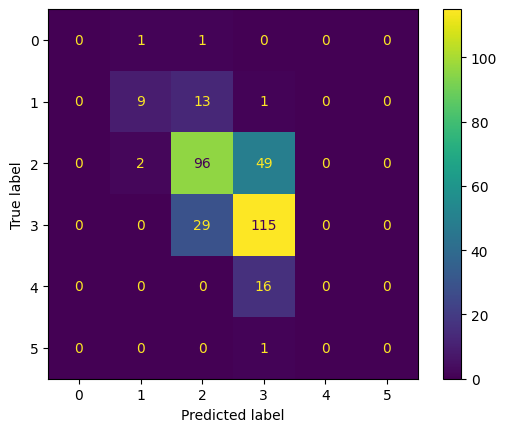

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1,2,3,4,5])
disp.plot()

#### Decision Tree Classification 

In [12]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[ 1,  0,  1,  0,  0,  0],
       [ 0,  8, 12,  3,  0,  0],
       [ 0, 12, 70, 56,  9,  0],
       [ 0,  1, 44, 90,  9,  0],
       [ 0,  0,  5, 10,  1,  0],
       [ 0,  0,  0,  1,  0,  0]])

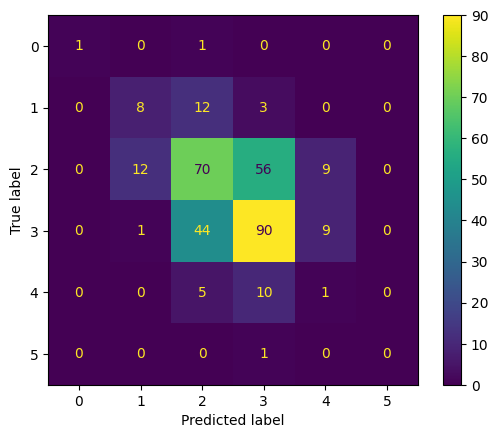

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1,2,3,4,5])
disp.plot()

### Question 3

#### Support Vector Machine algorithm

Micro F1-Score

Net TP = 9+96+115 = 220

Net FP = (1+1) + (13+1) + (2+49) + 29 + 16 + 1 = 113
Net FN = FP

Micro Precision = Net TP/(Net TP + Net FP) = 220/(220+113) = 66.07%

Macro F1-Score
Precision = TP/ (TP + FP)
- For class 0: Precision = 0 / (0+1+1) = 0% 
- For class 1: Precision = 9 / (9+13+1) = 39.13% 
- For class 2: Precision = 96 / (2+96+49) = 65.31% 
- For class 3: Precision = 115 / (29+115) = 79.86% 
- For class 4: Precision = 0/ (0+16) = 0% 
- For class 5: Precision = 0/ (0+1) = 0% 

Macro Precision: (0 + 39.13 + 65.31 + 79.86 + 0 + 0) / 6 = 30.72% (approximately)


#### Decision Tree Classification 

Micro F1-Score

Net TP = 1+8+70+90+1 = 170

Net FP = 1 + (12+3) + (12+56+9) + (1+44+9) + (5+10) + 1 = 163

Net FN = FP

Micro precision = Net TP/(Net TP + Net FP) = 170/(170+163) = 51.05%

Macro F1-Score
Precision = TP/ (TP + FP)
- For class 0: Precision = 1 / (1+1) = 50% 
- For class 1: Precision = 8 / (8+12+3) = 34.78% 
- For class 2: Precision = 70 / (12+70+56+9) = 47.62% 
- For class 3: Precision = 90 / (1+44+90+9) = 62.5% 
- For class 4: Precision = 1/ (5+10+1) = 6.25% 
- For class 5: Precision = 0/ (0+1) = 0% 

Macro Precision: (50 + 34.78 + 47.62 + 62.5 + 6.25) / 6 = 33.525% (approximately)


Based on my above calculation of micro precision, i have concluded that the precision of the Support Vector machine is better in both scenarios and thus it performed better overall. This is also due to the higher TP to FP ratio as we can see from the above calculation. The macro precision may not be as accurate because the 50% may affect the results quite significantly.


## A4. Independent Evaluation (Competition)

### Question 1

Next, We read the data set submission without the score and use our svm model before to test the new 200 lines and guess the score

In [14]:
dataset = pd.read_csv('FIT1043-Essay-Features-Submission.csv')
X_value = dataset.iloc[:, [2,7,8,11,13]]


We reuse StandardScaler from sklear to fit and transform the data in testing 

In [15]:
X_test = sc.transform(X_value)

/Users/harveykoay/anaconda3/envs/Rp_Env/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


We use our svm model to predict to get the final score respectively and place it in a csv file after

In [16]:
y_pred_sub = clf.predict(X_test)
y_pred_sub

array([4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 3,
       2, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 2, 3, 3, 3, 3, 4,
       3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4,
       2, 3, 4, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 4, 2, 4, 3, 4, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4,
       2, 3, 4, 4, 3, 4, 2, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3,
       4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 2, 4, 3, 4, 4, 3, 4, 4,
       4, 3, 3, 4, 4, 2, 4, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3,
       3])

### Question 2a

In [17]:
dataset['score'] = y_pred_sub
final_score = dataset[['essayid','score']]

In [18]:
final_score

,essayid,score
0,1623,4
1,1143,3
2,660,3
3,1596,4
4,846,4
...,...,...
194,1226,3
195,862,4
196,1562,4
197,1336,3


In [19]:
final_score.to_csv('predicted_score.csv', index = False)

# Part B : Selection of Dataset, Clustering and Video Preparation

## B1. Selection of a Dataset with missing data, Clustering

### Question 1

The data set i am going to use from kaggle.com is https://www.kaggle.com/datasets/rohitudageri/credit-card-details



In [20]:
df = pd.read_csv('Credit_card.csv')
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


### Question 2

From the dataframe above, i am going to wrangle on the dataset to handle the missing data for the Family_Members and annual income as we are going to use these two numerical features for k-means clustering

In [21]:
# First we check the Annual_income of the list
print(df['Annual_income'].tolist())


[180000.0, 315000.0, 315000.0, nan, 315000.0, 315000.0, 315000.0, 180000.0, 450000.0, 450000.0, 450000.0, 90000.0, nan, 90000.0, 472500.0, 270000.0, 270000.0, 126000.0, 126000.0, 90000.0, 202500.0, 202500.0, 157500.0, 112500.0, 180000.0, 540000.0, 112500.0, nan, 292500.0, 540000.0, 90000.0, 112500.0, 135000.0, 135000.0, 180000.0, 112500.0, 292500.0, 76500.0, 215100.0, 450000.0, 270000.0, 225000.0, 225000.0, 225000.0, 157500.0, 157500.0, 67500.0, 180000.0, 180000.0, 157500.0, 157500.0, 171000.0, 135000.0, 135000.0, 103500.0, 103500.0, 225000.0, 225000.0, 225000.0, 180000.0, 157500.0, 157500.0, 180000.0, 180000.0, 99000.0, nan, 99000.0, 99000.0, 391500.0, 391500.0, 391500.0, 65250.0, 72900.0, 225000.0, 67500.0, 180000.0, nan, 202500.0, 157500.0, 202500.0, 270000.0, 135000.0, 360000.0, 256500.0, 256500.0, 157500.0, 225000.0, 180000.0, 180000.0, 202500.0, 202500.0, 202500.0, 315000.0, 225000.0, 126000.0, 675000.0, 135000.0, 135000.0, 247500.0, 103500.0, 85500.0, 135000.0, 135000.0, 180000.

After seeing the above values we can see that some of the annual income are nan or none values. Thus, I am going to have to clean this data to prepare for the clustering

In [22]:
# Removing rows with NaN values in 'Annual_income'
df = df.dropna(subset=['Annual_income'])


In [23]:
print(df['Annual_income'].tolist())


[180000.0, 315000.0, 315000.0, 315000.0, 315000.0, 315000.0, 180000.0, 450000.0, 450000.0, 450000.0, 90000.0, 90000.0, 472500.0, 270000.0, 270000.0, 126000.0, 126000.0, 90000.0, 202500.0, 202500.0, 157500.0, 112500.0, 180000.0, 540000.0, 112500.0, 292500.0, 540000.0, 90000.0, 112500.0, 135000.0, 135000.0, 180000.0, 112500.0, 292500.0, 76500.0, 215100.0, 450000.0, 270000.0, 225000.0, 225000.0, 225000.0, 157500.0, 157500.0, 67500.0, 180000.0, 180000.0, 157500.0, 157500.0, 171000.0, 135000.0, 135000.0, 103500.0, 103500.0, 225000.0, 225000.0, 225000.0, 180000.0, 157500.0, 157500.0, 180000.0, 180000.0, 99000.0, 99000.0, 99000.0, 391500.0, 391500.0, 391500.0, 65250.0, 72900.0, 225000.0, 67500.0, 180000.0, 202500.0, 157500.0, 202500.0, 270000.0, 135000.0, 360000.0, 256500.0, 256500.0, 157500.0, 225000.0, 180000.0, 180000.0, 202500.0, 202500.0, 202500.0, 315000.0, 225000.0, 126000.0, 675000.0, 135000.0, 135000.0, 247500.0, 103500.0, 85500.0, 135000.0, 135000.0, 180000.0, 121500.0, 180000.0, 22

Thus we can see that in the above values after wrangling on the data, we have solved the missing data for Annual_income. For the Family_Members column there is no missing data thus i will wrangle it to check for family members less or equal to 6 to prevent outliers

In [24]:
print(df['Family_Members'].tolist())

[2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 1, 1, 2, 1, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 1, 4, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 3, 1, 4, 4, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 4, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2, 1, 1, 6, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 4, 2, 2, 2, 2, 1, 1, 2, 2, 2, 4, 4, 3, 3, 1, 1, 1, 3, 2, 2, 1, 3, 2, 1, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 3, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 4, 1, 2, 2, 2, 4, 2, 3, 2, 2, 4, 4, 2, 2, 2, 2, 1, 4, 1, 2, 2, 4, 2, 1, 2, 2, 3, 2, 1, 2, 1, 2, 3, 4, 2, 1, 1, 1, 3, 2, 2, 2, 3, 2, 4, 2, 1, 1, 2, 2, 4, 2, 2, 2, 1, 2, 1, 4, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 3, 3, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3, 5, 2, 2, 3, 2, 3, 2, 3, 4, 3, 3, 4, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 3, 1, 1, 2, 2, 1, 2, 

In [25]:
df = df[df['Family_Members'] <= 5]

In [26]:
print(df['Family_Members'].tolist())


[2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 1, 1, 2, 1, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 1, 4, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 3, 1, 4, 4, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 4, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 4, 2, 2, 2, 2, 1, 1, 2, 2, 2, 4, 4, 3, 3, 1, 1, 1, 3, 2, 2, 1, 3, 2, 1, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 3, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 4, 1, 2, 2, 2, 4, 2, 3, 2, 2, 4, 4, 2, 2, 2, 2, 1, 4, 1, 2, 2, 4, 2, 1, 2, 2, 3, 2, 1, 2, 1, 2, 3, 4, 2, 1, 1, 1, 3, 2, 2, 2, 3, 2, 4, 2, 1, 1, 2, 2, 4, 2, 2, 2, 1, 2, 1, 4, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 3, 3, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3, 5, 2, 2, 3, 2, 3, 2, 3, 4, 3, 3, 4, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 3, 1, 1, 2, 2, 1, 2, 1, 

Finally, we have successfully done data wrangling and we can proceed to K-means clustering

### Question 3

In [27]:
# Run the K-means clustering over the dataset using only 
# Annual_income and Family_Members column. Set K=4: we only want 
# to cluster the dataset into four subgroups

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(
    df[['Annual_income','Family_Members']])

/Users/harveykoay/anaconda3/envs/Rp_Env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
# Checking the Two cluster centers
kmeans.cluster_centers_

array([[2.03196114e+05, 2.13929619e+00],
       [1.04343750e+06, 2.87500000e+00],
       [1.10897179e+05, 2.12698413e+00],
       [3.67913793e+05, 2.26108374e+00]])

In [30]:
# Checking the Cluster labels
kmeans.labels_

array([0, 3, 3, ..., 0, 0, 0], dtype=int32)

### Question 4

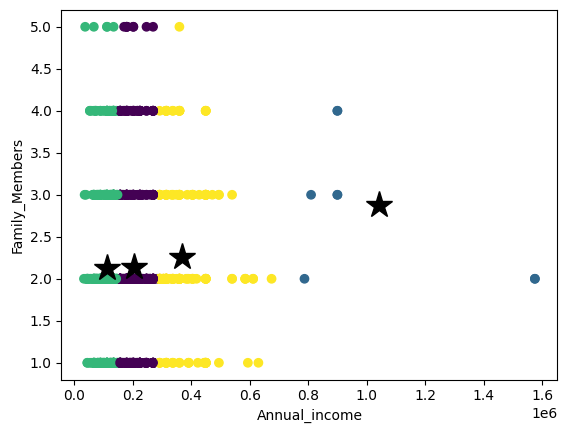

In [31]:
# Visualise the output labels
plt.scatter(
    x=df['Annual_income'],
    y=df['Family_Members'],
    c=kmeans.labels_)
# Visualising the cluster centers (black stars) 
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Annual_income')
plt.ylabel('Family_Members')
plt.show()

We can see that from the graph We have four different clusters where the first cluster is about 0.05 to 0.18 million annual income with a center of about 0.13 million annual income, second cluter which is the green cluster with about 0.18 to 0.32 million annual income with a centre of about 0.23 million annual income, third cluster which is in between 0.32 to 0.7 million annual income with a centre of about 0.42 million annual income and finally the last cluster which is more spread out having about 0.8 to about 1.6million annual income having a centre at 1.02 million annual income

## Conclusion

In this assignment we have discovered more on data wrangling, classification and clustering and perform it on a variety of data to learn the processes accordingly.